In [65]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [66]:
orgdata = pd.read_csv('1208.csv')

In [67]:
orgdata.head()

,編號,標題,分類,內文,相關資料
0,1,NaN,1,事隔數月，戴蒙的立場依舊沒變，但他找了個新的方式詮釋加密貨幣。 戴蒙：加密貨幣是寵物石！ 加...,渣打銀行高管：比特幣2023或暴跌70%至5000美元！ 新興市場教父 : 比特幣將跌至1萬...
1,2,NaN,2,另一位用戶向 ChatGPT 發出創建交易終端的指令，ChatGPT 編寫的代碼，可串接全球...,比特幣後人類最重大的發明？「GPT-3」OpenAI 自然語言處理模型問世！ 馬斯克復盤「S...
2,3,NaN,2,首批比特幣消耗電力 他起頭向讀者簡單介紹了比特幣（BTC）的挖礦原理，稱比特幣的發明人一再強...,市場評論｜從政治經濟角度，觀看加密貨幣市場 Istari Venture投書》市場評論：現下...
3,4,NaN,2,信中寫道：另張聽證會傳票也在檯面上,SBF 辯「從沒出金領過錢」：FTX 一直有財務風控，新CEO不熟悉公司運作 FT爆背後真相...
4,5,NaN,2,目前 FTX 面臨 80 億美金的資金缺口，但據金融時報 SBF 的風險投資基金的投資變現或...,SBF 不斷發聲，為什麼他還沒坐牢？ 精華整理》SBF對談紐時作家 : Alameda與FT...


In [68]:
orgdata['seg'] = ""

In [69]:
jieba.analyse.set_stop_words('stopwords.txt') #stopwords 自己不要的字的字典(自己建立)
index = 0
for documents in orgdata['內文']: 
    seg_list = jieba.analyse.extract_tags(documents, 150) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\happy\AppData\Local\Temp\ipykernel_12428\119700141.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
jieba.load_userdict('./userdict.txt')
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['內文']: 
    seg_list = jieba.analyse.extract_tags(documents, 150) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\happy\AppData\Local\Temp\ipykernel_12428\4186519923.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
orgdata['seg']

0     [加密貨幣, 寵物石, 比特幣, 寵物, 區塊鏈, Web3, 價值, 暗示, 炒作, 美國...
1     [ChatGPT, 用戶, 加密貨幣, 推特, 創建, 編寫, 代碼, 幣安, 智能合約, ...
2     [比特幣, 加密貨幣, FTX, 電力, 李家, 中心化, 變成, 三個, 投資, 倒閉, ...
3                                 [另張, 聽證會, 傳票, 信中, 面上]
4     [投資, 美元, FTX, Alameda, 資金, SBF, Digital, 媒體, G...
5     [加密貨幣, 投資, Laser, Digital, 機構, 資產, Jez, Mohide...
6     [CZ, FTX, 誤解, 推特, SBF, 幣安, 加密貨幣, 文殺, 一條, 對決, 多...
7     [SBF, 聽證會, 13, 委員會, 必須, 參加, Caroline, 律師, 事務, ...
8     [Aleo, 挖礦, 隱私鏈, 啟動, 測試, 網積分, 2019, 創立, 首個, 零知識...
9     [SBF, FTX, 調查, 指控, 巴哈, 簡單, 行為, 混亂, 這種, 解釋, 雖然,...
10    [荷蘭, 設備, ASML, 中國, 先進, 出口, 限制, 報導, 半導體, 美國, 銷售...
11    [出貨量, 萬部, TWS, 市占率, 蘋果, Canalys, 音頻, 設備, AirPo...
12    [Colas, 衰退, 經濟, 模型, 紐約, 聯儲, 10, 公債, 鮑爾, 機率, 12...
13    [運算, 資料, 英特, Intel, 電力, 解決, vRAN, 產品, 可永續, 整體,...
14    [Axion, T2000, KLA, 記憶體, 3D, 結構, 晶片, 技術, 射線, 測...
15    [PChome, 商店, 減資, 轉型, 街市, 網路, 集團, 啟動, 減資案, 減少, ...
16    [桑那州, Pat, Gelsinger, 台積, 投資, 彈性, 移機, 半導, 台積電,...
17    [飛行, 機智號, 火星, 直升, 地球, 公尺, 毅力, 大氣, 分鐘, 離地, 

In [72]:
orgdata.to_csv("1208_textmining.csv", index=False)

In [73]:
subdata = orgdata['seg']

In [74]:
type(subdata)

pandas.core.series.Series

In [75]:
subdata_seg_list = subdata.tolist()
type(subdata_seg_list)

list

In [76]:
subdata_seg_list

[['加密貨幣',
  '寵物石',
  '比特幣',
  '寵物',
  '區塊鏈',
  'Web3',
  '價值',
  '暗示',
  '炒作',
  '美國',
  'Gary',
  'Dahl',
  '進紙',
  '籠子裡',
  '竟熱銷',
  '出數',
  '百萬顆',
  '人則',
  '很療',
  '確湧',
  '出許',
  '仿冒品',
  '達數',
  '石熱潮',
  '助長',
  '主義的',
  '資金',
  '逃稅',
  '性販',
  '運輸',
  '允許',
  '頭號',
  '重點',
  '厭惡',
  '技術',
  '未來',
  '討厭',
  '智能合約',
  '價格',
  '銀行們',
  '強勁動',
  '現價',
  '24',
  '幾無漲',
  '17',
  '000',
  '上漲',
  '3.8%',
  '墨西哥',
  '完美',
  '提到',
  '想到',
  '商品',
  '美元',
  '代表',
  '事情',
  '正在'],
 ['ChatGPT',
  '用戶',
  '加密貨幣',
  '推特',
  '創建',
  '編寫',
  '代碼',
  '幣安',
  '智能合約',
  '串接',
  '終端',
  'API',
  'BTC',
  'USDT',
  '能檢測',
  '並協助',
  '並不總是',
  '正確',
  '創造性',
  '思維',
  '區塊鏈',
  '社會產生',
  '影響',
  'Goose',
  'Wayne',
  '機器',
  '投資',
  'Multicoin',
  'Capital',
  '創辦',
  'Kyle',
  'Samani',
  '關於未來',
  '成長',
  '結果',
  '還針',
  '門羅幣',
  '比特幣',
  '技術',
  '出長',
  '大論',
  '創作',
  '音樂',
  'Web3',
  '創業者',
  'Jay',
  'Azhang',
  '關於在',
  '上虧',
  '還有',
  '選擇',
  'NFT',
  '培養',
  '對沖',
  'FTX',
  '崩潰',
  '流動性',


In [77]:
# for 迴圈的另一寫法
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat) # Counter：dict 的子類別，用來計算可雜湊 ( hashable ) 物件的數量
# 原本 for 迴圈寫法
# for sublist in subdata_seg_list:
#     for x in sublist:
#         flat.append(x)

In [78]:
diction_key = pd.DataFrame(diction.keys())
diction_values = pd.DataFrame(diction.values())
df = [diction_key, diction_values]
result = pd.concat(df, axis=1)
result.columns = ['單字', 'freguency']
result

,單字,freguency
0,加密貨幣,7
1,寵物石,1
2,比特幣,4
3,寵物,1
4,區塊鏈,4
...,...,...
1958,至今,1
1959,需求,1
1960,明年,1
1961,直接,1


In [79]:
result.describe()

,freguency
count,1963.000000
mean,1.271523
std,0.749542
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


可找出出現次數較多的值(捨棄掉過多低次數的較不重要訊息)

px.bar(result[(result['freguency']>2) & (result['freguency']<6)].sort_values(by=['freguency'], ascending=False), x='level', y='freguency', title='text frequency)

In [80]:
diction.keys()

dict_keys(['加密貨幣', '寵物石', '比特幣', '寵物', '區塊鏈', 'Web3', '價值', '暗示', '炒作', '美國', 'Gary', 'Dahl', '進紙', '籠子裡', '竟熱銷', '出數', '百萬顆', '人則', '很療', '確湧', '出許', '仿冒品', '達數', '石熱潮', '助長', '主義的', '資金', '逃稅', '性販', '運輸', '允許', '頭號', '重點', '厭惡', '技術', '未來', '討厭', '智能合約', '價格', '銀行們', '強勁動', '現價', '24', '幾無漲', '17', '000', '上漲', '3.8%', '墨西哥', '完美', '提到', '想到', '商品', '美元', '代表', '事情', '正在', 'ChatGPT', '用戶', '推特', '創建', '編寫', '代碼', '幣安', '串接', '終端', 'API', 'BTC', 'USDT', '能檢測', '並協助', '並不總是', '正確', '創造性', '思維', '社會產生', '影響', 'Goose', 'Wayne', '機器', '投資', 'Multicoin', 'Capital', '創辦', 'Kyle', 'Samani', '關於未來', '成長', '結果', '還針', '門羅幣', '出長', '大論', '創作', '音樂', '創業者', 'Jay', 'Azhang', '關於在', '上虧', '還有', '選擇', 'NFT', '培養', '對沖', 'FTX', '崩潰', '流動性', '一位', '交易', '段落', '漏洞', '博客', '聊天', '歌曲', '指令', '扮演', '例子', '生成', '典型', '支付', '改善', '不足', '回答', '共同', '然而', '才能', '利用', '全球', '提供', '要求', '部分', '一些', '基金', '電力', '李家', '中心化', '變成', '三個', '倒閉', '他稱', '不滿', '臉書', '貼文', '消耗', '起頭', '讀者', '簡單', '介紹', '挖礦', '之後就', '華

In [81]:
type(diction)

collections.Counter

In [82]:
diction

Counter({'加密貨幣': 7,
         '寵物石': 1,
         '比特幣': 4,
         '寵物': 1,
         '區塊鏈': 4,
         'Web3': 4,
         '價值': 3,
         '暗示': 2,
         '炒作': 2,
         '美國': 7,
         'Gary': 1,
         'Dahl': 1,
         '進紙': 1,
         '籠子裡': 1,
         '竟熱銷': 1,
         '出數': 1,
         '百萬顆': 1,
         '人則': 1,
         '很療': 1,
         '確湧': 1,
         '出許': 1,
         '仿冒品': 1,
         '達數': 1,
         '石熱潮': 1,
         '助長': 1,
         '主義的': 1,
         '資金': 3,
         '逃稅': 1,
         '性販': 1,
         '運輸': 1,
         '允許': 1,
         '頭號': 1,
         '重點': 1,
         '厭惡': 1,
         '技術': 5,
         '未來': 4,
         '討厭': 1,
         '智能合約': 2,
         '價格': 4,
         '銀行們': 1,
         '強勁動': 1,
         '現價': 1,
         '24': 1,
         '幾無漲': 1,
         '17': 1,
         '000': 3,
         '上漲': 1,
         '3.8%': 1,
         '墨西哥': 1,
         '完美': 1,
         '提到': 2,
         '想到': 1,
         '商品': 2,
         '美元': 7,
  

In [83]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [84]:
import numpy as np

In [85]:
mask = np.array(Image.open("black_rectangle.png")) # 想呈現的圖案形狀
font = "C:\Windows\Fonts\mingliu.ttc" # 選取想呈現字體的字體路徑

In [86]:
# 把文字變成圖片(文字雲)
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

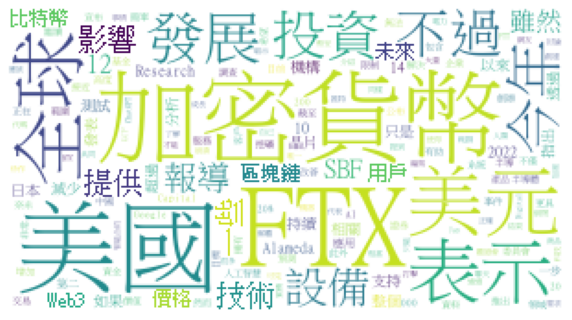

In [87]:
# 調圖片的大小顯示圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [88]:
show1_key = pd.DataFrame(Counter(diction).keys())
show1_values = pd.DataFrame(Counter(diction).values())

In [89]:
df = [show1_key, show1_values]

In [90]:
result = pd.concat(df, axis=1)
# concat 裡的 axis 預設是 0，也就是你的資料是會往下長。設成1，是想讓資料往橫的方向長。
result.columns = ['key', 'frequency']
result

,key,frequency
0,加密貨幣,7
1,寵物石,1
2,比特幣,4
3,寵物,1
4,區塊鏈,4
...,...,...
1958,至今,1
1959,需求,1
1960,明年,1
1961,直接,1


In [91]:
import plotly.express as px
import pandas as pd

px.bar(result, x='key', y='frequency', title='frequency of each key')

## 共現性分析

In [92]:
import pandas as pd
from collections import Counter

subdata = orgdata[['內文','編號','seg']]

output_series = subdata['seg']
result = ''.join(''.join(map(str, l)) for l in output_series)

result

In [95]:
subdata_seg_list

[['加密貨幣',
  '寵物石',
  '比特幣',
  '寵物',
  '區塊鏈',
  'Web3',
  '價值',
  '暗示',
  '炒作',
  '美國',
  'Gary',
  'Dahl',
  '進紙',
  '籠子裡',
  '竟熱銷',
  '出數',
  '百萬顆',
  '人則',
  '很療',
  '確湧',
  '出許',
  '仿冒品',
  '達數',
  '石熱潮',
  '助長',
  '主義的',
  '資金',
  '逃稅',
  '性販',
  '運輸',
  '允許',
  '頭號',
  '重點',
  '厭惡',
  '技術',
  '未來',
  '討厭',
  '智能合約',
  '價格',
  '銀行們',
  '強勁動',
  '現價',
  '24',
  '幾無漲',
  '17',
  '000',
  '上漲',
  '3.8%',
  '墨西哥',
  '完美',
  '提到',
  '想到',
  '商品',
  '美元',
  '代表',
  '事情',
  '正在'],
 ['ChatGPT',
  '用戶',
  '加密貨幣',
  '推特',
  '創建',
  '編寫',
  '代碼',
  '幣安',
  '智能合約',
  '串接',
  '終端',
  'API',
  'BTC',
  'USDT',
  '能檢測',
  '並協助',
  '並不總是',
  '正確',
  '創造性',
  '思維',
  '區塊鏈',
  '社會產生',
  '影響',
  'Goose',
  'Wayne',
  '機器',
  '投資',
  'Multicoin',
  'Capital',
  '創辦',
  'Kyle',
  'Samani',
  '關於未來',
  '成長',
  '結果',
  '還針',
  '門羅幣',
  '比特幣',
  '技術',
  '出長',
  '大論',
  '創作',
  '音樂',
  'Web3',
  '創業者',
  'Jay',
  'Azhang',
  '關於在',
  '上虧',
  '還有',
  '選擇',
  'NFT',
  '培養',
  '對沖',
  'FTX',
  '崩潰',
  '流動性',


In [96]:
a = subdata_seg_list

In [97]:
x = pd.Series(a)

In [98]:
x

0     [加密貨幣, 寵物石, 比特幣, 寵物, 區塊鏈, Web3, 價值, 暗示, 炒作, 美國...
1     [ChatGPT, 用戶, 加密貨幣, 推特, 創建, 編寫, 代碼, 幣安, 智能合約, ...
2     [比特幣, 加密貨幣, FTX, 電力, 李家, 中心化, 變成, 三個, 投資, 倒閉, ...
3                                 [另張, 聽證會, 傳票, 信中, 面上]
4     [投資, 美元, FTX, Alameda, 資金, SBF, Digital, 媒體, G...
5     [加密貨幣, 投資, Laser, Digital, 機構, 資產, Jez, Mohide...
6     [CZ, FTX, 誤解, 推特, SBF, 幣安, 加密貨幣, 文殺, 一條, 對決, 多...
7     [SBF, 聽證會, 13, 委員會, 必須, 參加, Caroline, 律師, 事務, ...
8     [Aleo, 挖礦, 隱私鏈, 啟動, 測試, 網積分, 2019, 創立, 首個, 零知識...
9     [SBF, FTX, 調查, 指控, 巴哈, 簡單, 行為, 混亂, 這種, 解釋, 雖然,...
10    [荷蘭, 設備, ASML, 中國, 先進, 出口, 限制, 報導, 半導體, 美國, 銷售...
11    [出貨量, 萬部, TWS, 市占率, 蘋果, Canalys, 音頻, 設備, AirPo...
12    [Colas, 衰退, 經濟, 模型, 紐約, 聯儲, 10, 公債, 鮑爾, 機率, 12...
13    [運算, 資料, 英特, Intel, 電力, 解決, vRAN, 產品, 可永續, 整體,...
14    [Axion, T2000, KLA, 記憶體, 3D, 結構, 晶片, 技術, 射線, 測...
15    [PChome, 商店, 減資, 轉型, 街市, 網路, 集團, 啟動, 減資案, 減少, ...
16    [桑那州, Pat, Gelsinger, 台積, 投資, 彈性, 移機, 半導, 台積電,...
17    [飛行, 機智號, 火星, 直升, 地球, 公尺, 毅力, 大氣, 分鐘, 離地, 

In [99]:
type(x)

pandas.core.series.Series

x['seg'] = x['seg'].str.replace("', '", " ")

In [100]:
df = x.to_frame()

In [101]:
df

,0
0,"[加密貨幣, 寵物石, 比特幣, 寵物, 區塊鏈, Web3, 價值, 暗示, 炒作, 美國..."
1,"[ChatGPT, 用戶, 加密貨幣, 推特, 創建, 編寫, 代碼, 幣安, 智能合約, ..."
2,"[比特幣, 加密貨幣, FTX, 電力, 李家, 中心化, 變成, 三個, 投資, 倒閉, ..."
3,"[另張, 聽證會, 傳票, 信中, 面上]"
4,"[投資, 美元, FTX, Alameda, 資金, SBF, Digital, 媒體, G..."
5,"[加密貨幣, 投資, Laser, Digital, 機構, 資產, Jez, Mohide..."
6,"[CZ, FTX, 誤解, 推特, SBF, 幣安, 加密貨幣, 文殺, 一條, 對決, 多..."
7,"[SBF, 聽證會, 13, 委員會, 必須, 參加, Caroline, 律師, 事務, ..."
8,"[Aleo, 挖礦, 隱私鏈, 啟動, 測試, 網積分, 2019, 創立, 首個, 零知識..."
9,"[SBF, FTX, 調查, 指控, 巴哈, 簡單, 行為, 混亂, 這種, 解釋, 雖然,..."


DF = pd.DataFrame(df, columns = ['seg'])

type(df)

pandas.core.frame.DataFrame

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

docs = output_series['seg'].tolist()
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df

KeyError: 'seg'

In [106]:
coocc = df.T.dot(df)
coocc

TypeError: can't multiply sequence by non-int of type 'list'

In [60]:
import plotly.express as px
fig = px.imshow(coocc)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()

In [ ]:
result = coocc.values.flatten()
len(result)

In [ ]:
df_describe = pd.DataFrame(result)
df_describe.describe()

In [ ]:
px.histogram(df)

In [ ]:
import numpy as np

filter_num_up = 60
filter_num_down = 120
getid = coocc.index
important = pd.DataFrame(columns = getid).T
important['relation'] = ""
dropid = []

for i in range(len(coocc)):
    result = coocc[(coocc.iloc[i] > filter_num_up) & (coocc.iloc[i] < filter_num_down)].index.tolist()
    if(len(result) > 0):
        important['relation'].loc[getid[i]] = coocc[(coocc.iloc[i] > filter_num_up) & (coocc.iloc[i] < filter_num_down)].index.tolist()
        print(important['relation'].loc[getid[i]])
    else:
        dropid.append(i)
        important = important.drop([getid[i]])

In [ ]:
important

In [ ]:
np.asarray(getid[dropid])

In [ ]:
subcoocc = coocc.drop(np.asarray(getid[dropid]))

In [ ]:
subcoocc

In [ ]:
subcoocc.drop(subcoocc.columns[dropid], axis=1, inplace=True)
subcoocc

刪掉不要的值的縱列

subcoocc.drop(columns=['不致'], axis=1, inplace=True)

In [ ]:
刪掉不要的值的行

subcoocc.drop(index='不致')

In [ ]:
sta = subcoocc.describe()
from IPython.core.display import HTML
display(HTML(sta.to_html()))

In [ ]:
fig = px.imshow(subcoocc)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()

In [ ]:
from IPython.core.display import HTML
display(HTML(important.to_html()))

In [ ]:
px.histogram(coocc)